In [34]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
Numpy: 1.26.4
Pandas: 2.2.2
Matplotlib: 3.9.0
Seaborn: 0.13.2
Scipy: 1.13.1


In [35]:

# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv(r"C:\Users\munni\OneDrive\Desktop\fraud detection\creditcard.zip")
data = data[['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'Class']]


# Start exploring the dataset
print(data.columns)


Index(['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'Class'], dtype='object')


In [37]:
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())



(28481, 8)
                Time        Amount            V1            V2            V3  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     89.957884     -0.001143     -0.018290      0.000795   
std     47584.727034    270.894630      1.994661      1.709050      1.522313   
min         0.000000      0.000000    -40.470142    -63.344698    -31.813586   
25%     53924.000000      5.980000     -0.908809     -0.610322     -0.892884   
50%     84551.000000     22.350000      0.031139      0.051775      0.178943   
75%    139392.000000     78.930000      1.320048      0.792685      1.035197   
max    172784.000000  19656.530000      2.411499     17.418649      4.069865   

                 V4            V5         Class  
count  28481.000000  28481.000000  28481.000000  
mean       0.000350     -0.015666      0.001720  
std        1.420003      1.395552      0.041443  
min       -5.266509    -42.147898      0.000000  
25%       -0.84737

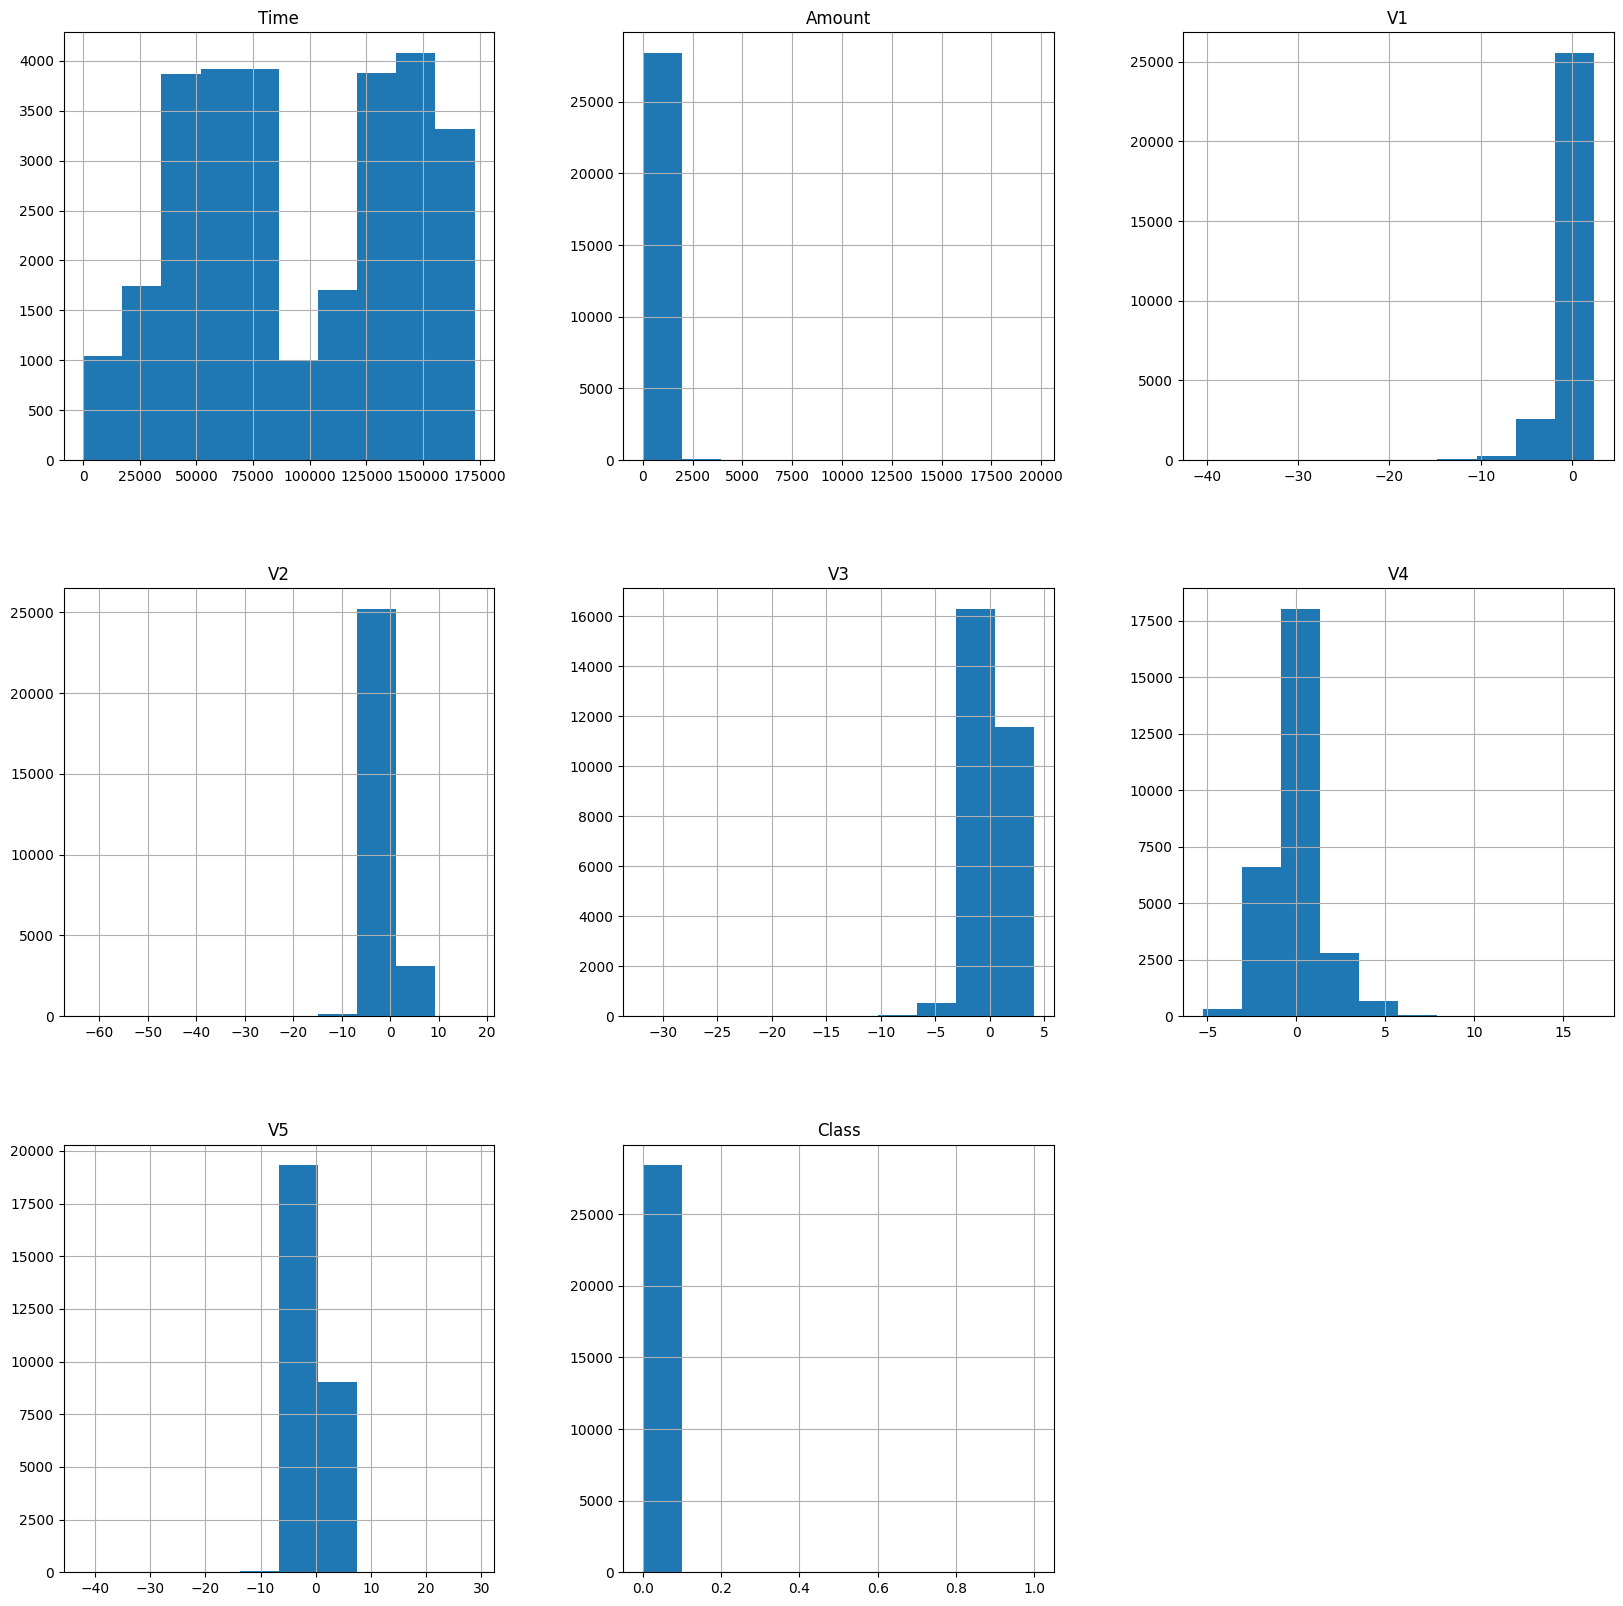

In [38]:


data.hist(figsize = (20, 20))
plt.show()



In [39]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


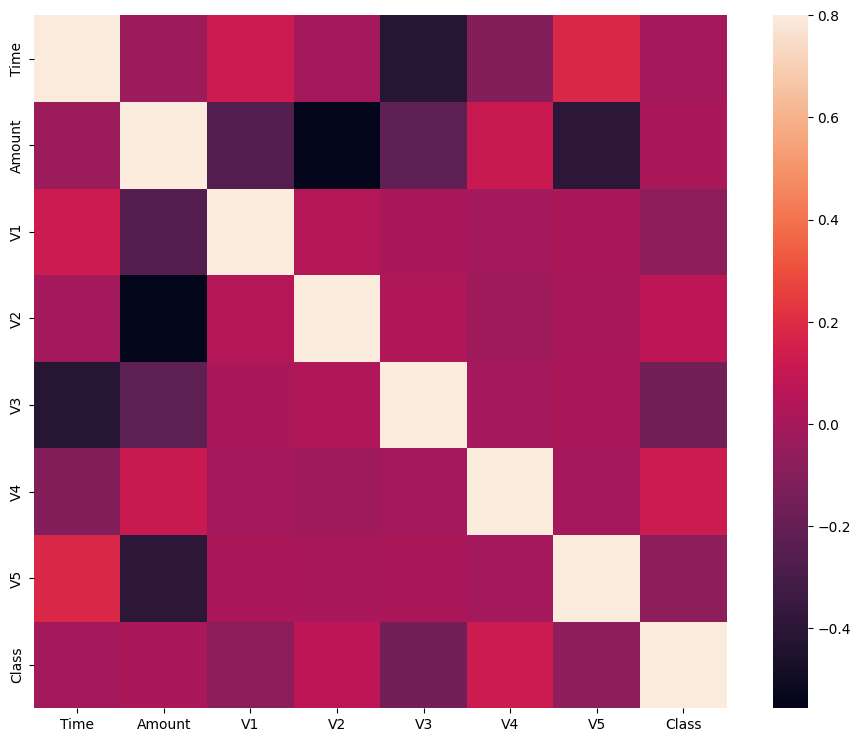

In [40]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [41]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)



(28481, 7)
(28481,)


In [42]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 85
0.9970155542291352
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.14      0.14      0.14        49

    accuracy                           1.00     28481
   macro avg       0.57      0.57      0.57     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 900x700 with 0 Axes>